# be humble view bumble

How do insects see the world? A recent review shows the magnitude of variation of visual perception across the phylum of insects (van der Kooi et al. 2021). Nonetheless, many of which have a set of 3 different wavelength receptors, covering a range of wavelengths from ~300 to ~700 nm (or in words, from UV to red). As there is no direct physical way of measuring this perception, a framework combining physiological exminations, wavelength measurements and mathematical transformations was set up during the 20th century (Wyszecki & Spines 1982, Chittka & Waser 1997). Thus, it is possible to compare different flowers by how they are perceived by an insect. This notebook implements the concept described by Chittka & Kevan (2005) (and basically shares its nomenclature) and enables the comparison of multiple species of flowers on how they are sensed by a trichromatic insect eye.

## Import the backbone

At first the correspondent module needs to be loaded:

In [1]:
from bumblecore import *
%matplotlib inline 

The notebook depends on physical wavelength data measured from leaf samples (or anything else ;-) ). There are some prerequisites that should be fulfilled, for a proper analysis:
- Measurements of at least every 5 nm steps from 300 to 700 nm (it is no problem if finer steps and over a larger range; the data will be cut subset later). 
- Each measure needs to be mapped to its wavelength, otherwise it is not possible to transfer it to insect vision.

Therefore a `csv`-file (can be seperated by "`,`", "`;`" or tabs "`\t`") should be constructed with the following structure: 
- No header row
- First column stores the wavelengths of the measurements (the decimal seperator is the dot "`.`")
- Column "`2`" to "`n+1`" store the measurements of wavelength reflections for all "`n`" samples

Here is an example (`<...>` reflects additional rows/columns); remark that the first column represents the wavelength in nm:

`300.0,0.383,6.963,0.421,<...>,0.281`  
`300.37,0.376,7.038,0.458,<...>,0.344`  
`300.74,0.412,7.053,0.455,<...>,0.363`  
`301.1,0.369,7.005,0.466,<...>,0.371`  
`<...>,<...>,<...>,<...>,<...>,<...>`  
`699.82,23.876,18.449,18.429,<...>,15.538`  
`700.15,24.095,18.341,18.518,<...>,15.67`

Now you can upload your wavelength emission data. Just run the next codeblock and select the file you want to upload (emission values do not need to be standardized to the interval `[0,1]`).

In [2]:
wl_uploader = input_flowers()

FileUpload(value={}, accept='.csv', description='Upload')

For a complete analysis meta data of the samples is required. Therefore, this script uses another `csv`-file that specifies genus, species, leaf area and additional information (e.g. unique ID) of each sample. In principal, these "fields" can determine any kind of categorical assignment, but are thought to be used as defined by there name. So, to standardize the input, the `csv`-file for meta information should have the following structure:
- 4 columns, whereas the encoding is in the following order: genus, species epithet, leaf area, additional information.
- Each `n`-th row corresponds to the same sample as the `n+1`-th column of the previously uploaded reflection data `csv`-file. 
- No header should be used

Here is again an example:

`Gentiana,acaulis,stigma,1`  
`Gentiana,acaulis,stigma,2`  
`Primula,lutea,apical,1`  
`Primula,lutea,basal,1`  
`<...>,<...>,<...>,<...>`  
`Primula,hirsuta,apical,10`  
`Primula,hirsuta,basal,10`


The next codeblock contains the uploading bar for the `csv`-file for meta data. Run the block and select the file.

In [3]:
meta_uploader = input_flowers()

FileUpload(value={}, accept='.csv', description='Upload')

After selecting both files containing wavelength reflection data and meta information, please run the next codeblock to finally import your data. If one or the other file is missing, data will not be loaded, but an example dataset on alpine flowers used.

In [4]:
wl_df = parse_flowers(wl_uploader)
meta_df = parse_flowers(meta_uploader, data=False)

flowers = new_floral_spectra(wl_df, meta_df)

You did not successfully select a file. The example file will be used.
You did not successfully select a file. The example file will be used.


As a first processing step a so called min-max normalization is performed on the wavelength spectrum of each sample. Thus, the whole data lies within the real interval `[0,1]`.

## Select genus and leaf area

A genus can be chosen to focus analysis on:

In [14]:
genus_choice = flowers.select_key()

Dropdown(description='Genus:', options=(('Rhododendron', 0), ('Gentiana', 1), ('Silene_acaulis', 2), ('Primula…

A leaf area can be chosen to focus analysis on:

In [15]:
area_choice = flowers.select_key(key="area", genus_choice=genus_choice)

Dropdown(description='Area:', options=(('apical', 0), ('basa', 1), (None, 2)), value=0)

The following codeblock saves the choices for genus and leaf area.

In [16]:
genus = get_dropdown_value(genus_choice)
area = get_dropdown_value(area_choice)

# Plotting

## Preliminary note

In the follwing paragraphs, several different types of different plots analyzing the wavelength spectra can be produced. As there is a temporary folder in the background all plots made, can be downloaded in the end of this notebook. Therefore, each section has two codeblocks:
- The first one produces the graph for the selected genus/leaf area and shows the figure. 
- The second codeblock produces all possible combinations of genera and leaf areas (even all areas per genus in one plot as well as all the complete datset graph).

After running the blocks, the corresponding graphs are stored in the temporary directory. All figures are saved as `pdf` files, which render labels and text as real text blocks, so it is easy to change its formatting in graphic manipulation programs (e.g. Inkscape)

## Part 1 - Plotting the physical spectra

### Wavelength spectra

As a first analysis the simple pysical spectrum can be plotted for the wavelength. For each sample the normalized diffuse reflexion is mapped on the wavelength. Grouping is performed for different species. Furthermore, an additional bold line represents the arithmetic mean of reflexion within a specific group.
 
 Another feature of the figure is an ANOVA that is run at each wavelength between all species. As the reflexion measures of aspecific wavelength are not independent from the others, a Bonferroni correction on the p-values is chosen to account for that issue. Finally, wavelengths, where a significant difference (`corrected p-value < 0.05`) between the species was observed, a bar in the corresponding color (for human vision; colors outside our visual range are grey) is layed behind the curves.


#### A. Show plot for selected genus/leaf area

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


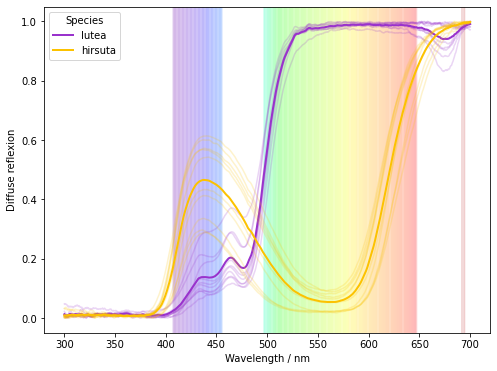

In [17]:
fig = flowers.plot_wl_spectra(genus, area, show_fig=True)
fig.show()

#### B. Produce all plots and save it

In [18]:
flowers.plot_all_inclusive(plot_type="wl_spectra")

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


### Principal component anaysis on physical spectra

This section can be used to get an overview of the dataset. The plot displays the first two component axes of the principal component analysis covering the whole range of the wavelength interval.

#### A. Show plot for selected genus/leaf area

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


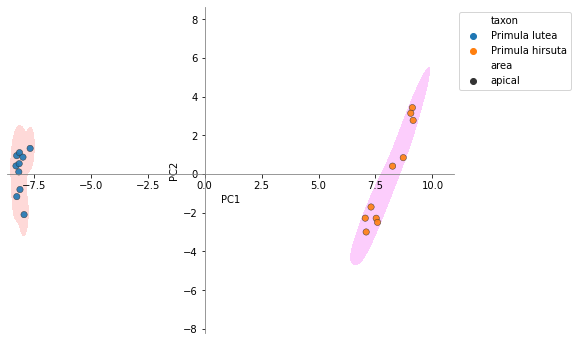

In [19]:
fig = flowers.plot_pca(genus=genus, area=area, show_fig=True)
fig.show()

#### B. Produce all plots and save it

In [11]:
flowers.plot_all_inclusive(plot_type="pca_physical")

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


## Part 2 - Plotting insect vision

To model, how a physical spectrum is perceived by the visual receptors of insects, this approach uses different sources of wavelength dependent data. We define
- $ \lambda $ as the wavelength in nm within the interval `[300,700]` 
- $ I_B(\lambda) $ as standard spectral reflectance function of the stimulus. In the concurrent case a standard is used by biological reasoning: as green is a dominant color in plant communities, we use spectral measurements of green leaves as a discrete estimate of this function for a given set of wavelengths. The original green leaf spectra of Chittka et al are applied.
- $ S(\lambda) $ as the spectral sensitivity function of a specific receptor. Thus, this function is also dependent on the insect (can be chosen for the corresponding section).
- $ D(\lambda) $ is the function of the illuminant (needs to be quantum based). In this notebook it is modelled by the D65 standard function (from Wyszecki & Spines 1982).

Using these functions the receptor specific sensitivity factor $ R $ can be set as  $R = \frac{1}{\int\limits_{300}^{700} I_B(\lambda) S(\lambda) D(\lambda) d \lambda}$. That factor enables to estimate how different a flower spectrum is perceived, in comparison to the green leaf spectrum.

Let $ I_B(\lambda) $ be the specific spectral reflectance function, which is estimated by the flower reflectance spectrum function. The relative amount of quantum catch absorbed by a specific receptor $ P $ can be modelled as $P = R \int\limits_{300}^{700} I_B(\lambda) S(\lambda) D(\lambda) d \lambda$. The property P can be imagined as the unprocessed input on the photoreceptor. To account for the neuronal photo-transduction process the excitation  $ E $ of the neurons as response to photons can be set as  $ E = \frac{P}{P+1} $. Using that non-linear transformation all excitation values cover the interval `[0,1)`. The quatum catches of the receptors $ P $ and excitation values $ E $ are used in the following paragraphs to produce graphs that help understanding flower colors in insect vision better.

## Select insect vision model

This notebook uses as standard the receptor model for <i>Bombus</i> of Briscoe & Chittka (2001), which was adjusted from Peitsch, et al. (1992). Also it is possible to run the plots on the model of <i>Apis mellifera</i> from the same publication.
Therefore, please select the following tick:

In [20]:
apis_tick = apis_checkbox()

Checkbox(value=False, description='Load Apis mellifera data')

Otherwise, it is possible to upload a private model for the receptor sensitivities of a trichromatic insect (e.g. as a result of retinographic measurements/ERGs). It should be a `csv` file in the follwing format:
- 4 columns correspond to (1) wavelength, (2) sensitivity of receptor A, (3) sensitivity of receptor B and (4) sensitivity of receptor C.
- The first row is a header and stores the names of the receptors as this is important for the later analysis. The name of the wavelength column can be unspecific as it is not used.
- The measurements should cover the interval of `[300,700]` nm in steps of at least `20`nm.
- Columns can be seperated by "`,`", "`;`" or tabs "`\t`".
- The sensitivity values should be within the interval `[0,1)`.


Here an example:
`wl,uv,blue,green`
`300,0.520498812198638000,0.293935596942901000,0.213320106267929000`  
`305,0.700174689292907000,0.286367371678352000,0.222233530133963000`  
`310,0.879850566387176000,0.278799146413802000,0.231146953999996000`  
`315,0.905661135911941000,0.278349559754133000,0.237155925482511000`  
`<...>,<...>,<...>,<...>`  
`700,0.012369079515337900,0.008392450399696820,0.022633979097008600`

If the range is shorter, it is no big trouble for the computations, but should be kept in mind for the interpretation of the results.

Run the following codeblock to upload private ERG data (it will not be stored for any other use.):

In [9]:
erg_uploader = input_flowers()

FileUpload(value={}, accept='.csv', description='Upload')

Run the next codeblock to save your choice and upload data if given.

In [21]:
apis_choice = apis_tick.value

flowers.set_different_erg(erg_uploader, apis=apis_choice)

You did not successfully select a file. Bombus data will be used.


### Triangle - The insect receptor's perspective

A very intuitive plot on the observer's side is the triangle plot. It uses a triangle to map the relative quantum catches of all 3 receptors. Let $A$, $B$ and $C$ be the receptors. Then the relative quantum catch $ P_{A_{rel}} $ can be computed with  $ P_{A_{rel}} = \frac{P_{A}}{P_{A} + P_{B} + P_{C}} $. This accounts in an analogous manner also for $ P_{B_{rel}} $ and $ P_{C_{rel}} $.

After that, all 3 values for each sample can be transformed to points within the color triangle. Let $ v_{tri} \in \mathbb{R}^2 $ be a point within the triangle representing a measurement on all 3 receptors. Then, its coordinates can be computed as in:

$$v_{tri} := \left(\begin{smallmatrix}x\\ y \end{smallmatrix}\right) := \left(\begin{smallmatrix} \sqrt{\frac{3}{4}} (- P_{A_{rel}} + P_{C_{rel}})
    \\ P_{B_{rel}}-\frac{P_{A_{rel}} + P_{C_{rel}})}{2} \end{smallmatrix}\right)$$

Using that formula, it is possible to compute the position of each sample within the insects visual space. The receptor wavelength ranges are typically overlapping. That is the reason, why it is physiologically impossible that one receptor shares the total amount of quantum catch, whereas the others have none (e.g. $ P_{A_{rel}} = 1 $ and $ P_{B_{rel}} = 0 $ and $ P_{C_{rel}} = 0 $). Thus some points within the triangle are not possible to reach. That is, why the so called spectrum locus is depicted in the plot (grey area). It does not set the border of unreachable points on the spectrum, but defines a line of monochromatic measurements, that offers kind of an impression, where observed wavelength signals could end up (Attention: it may happen, that your samples end up outside the spectrum locus. That is no need to worry, as natural spectra are often not monochromatic and the computation uses the integral over all wavelengths. Therefore, some samples could end up outside of the spectrum locus). To infer the spectrum locus: Let $ w_l $ be a vector of theoretical reflexion measurements, where only the value for a singular wavelength $ l \in [300,700] $ is larger than 0 (i.e. monochromatic spectrum). For this synthetic measurement, receptor specific quantum catch values $ P $ and further on a position on the triangle can be computed. This can be repeated for steps of 20-50 nm across the interval of `[300,700]`, although it is usually not done for wavelengths above $550$ nm, as the positions on the triangle do not change too much. This set of monochromatic spectra defines the so called spectrum locus on the triangle. So physiologically any measured spectrum must lie within the borders of this spectrum locus. The spectrum locus is visualized within the plot as a grey shape. For orientation, wavelength steps of 50 nm are depicted by a small text annotation telling the wavelength of the monochromatic spectrum at a given position.

A last short note: The center point within the triangle means, the spectrum was indistinguishable from the green leaf standard.

#### A. Show plot for selected genus/leaf area

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


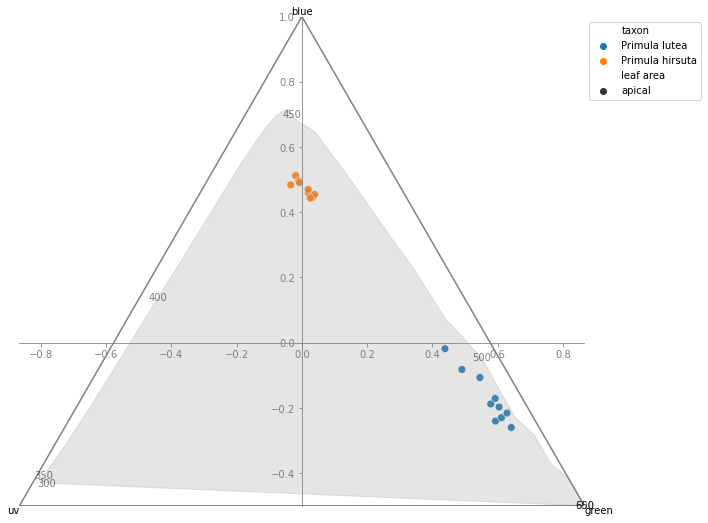

In [22]:
fig = flowers.plot_triangle(genus=genus, area=area, show_fig=True)
fig.show()

#### B. Produce all plots and save it

In [23]:
flowers.plot_all_inclusive(plot_type="triangle")

### Hexagon - The insect brain's perspective

As the perception of spectral signals is different from how it is received by the receptor, and furthermore integration of all receptors with each other, different color opponent analysis strategies were developed. One of that is the color hexagon.

Similar to the triangle, it maps the receptor's excitation values to a point on a hexagon. Let $ v_{hex} $ be a point on the hexagon, representing the exctitations of a sample. Then (again, $A$, $B$ and $C$ are the three receptors),

$$v_{hex} := \left(\begin{smallmatrix}x\\ y \end{smallmatrix}\right) := \left(\begin{smallmatrix} \sqrt{\frac{3}{4}} (- E_{A} + E_{C})
    \\ E_{B}-\frac{E_{A} + E_{C})}{2} \end{smallmatrix}\right) .$$

With this transformation, each spectrum can be plotted on the color hexagon. The advantage of the hexagon is the presence of 6 color categorizing areas, as a result of the color opponent installation. A point in one of these deltoid shaped areas around each corner of the hexagon, these reflect a strong perception of the samples spectrum on the receptor(s), depicted on the corner.

As for the triangle, also the color hexagon has some physiological limitations. Again those can be inferred by a spectrum locus. Similarly, vectors $w_l$ of monochromatic spectra are used. Receptor specific quantum catch values $ P $ are inferred as for the color triangle. Then corrected relative quantum catch values $ P_{A_{correl}} $, $ P_{B_{correl}} $ and $ P_{C_{correl}} $ are computed for each of the monochromatic vectors, as given in example for $ P_{A_{correl}} $:
$$ P_{A_{correl}} = \frac{3 P_{A}}{P_{A} + P_{B} + P_{C} }$$

The correcting factor `3` in the numerator should be highlighted. to account for the fact, that the overall intensity is a sum of three receptors in the denominator, but not in the numerator. 

After that, these factors $ P_{A_{correl}} $, $ P_{B_{correl}} $ and $ P_{C_{correl}} $ are used to generate excitation values using the non-linear transformation as described in the section of the color triangle. Finally, thesse receptor specific excitation values can be used to get the corresponding points on the hexagon, depicting the spectrum locus.

#### A. Show plot for selected genus/leaf area

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


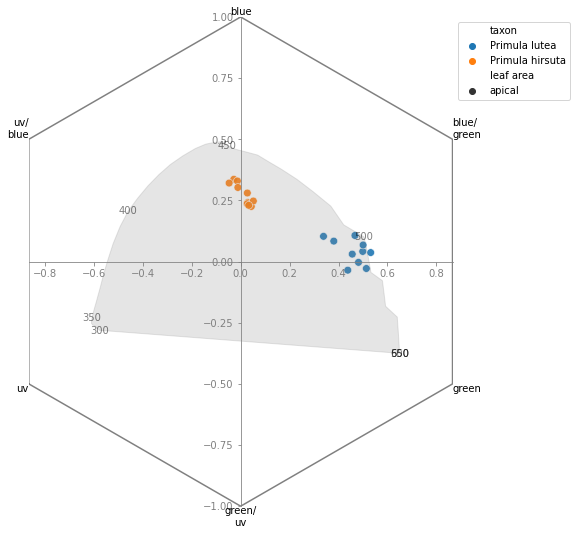

In [24]:
fig = flowers.plot_hexagon(genus=genus, area=area, show_fig=True)
fig.show()

#### B. Produce all plots and save it

In [25]:
flowers.plot_all_inclusive(plot_type="hexagon")

### Principal component anaysis on visual perception of spectra in insect's brain

This plot runs again a PCA, but this time uses the receptor specific exctitation values $ E $. Thus, it illustrates the variance over all three receptor types.

#### A. Show plot for selected genus/leaf area

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


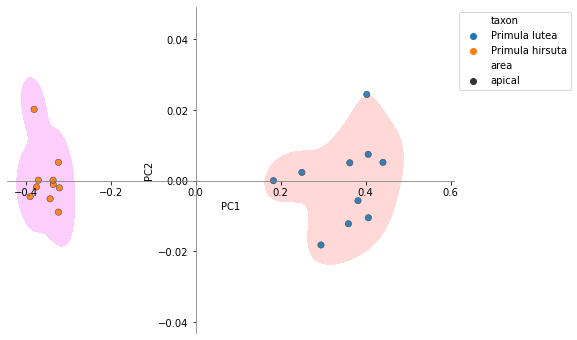

In [26]:
fig = flowers.plot_pca(genus=genus, area=area, show_fig=True, data_type="insect_vision")
fig.show()

#### B. Produce all plots and save it

In [27]:
flowers.plot_all_inclusive(plot_type="pca_insect_vision")

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


### Pairwise color distances

Using the positions of all samples on the color hexagon, pairwise color distances can be obtained. This is done by a simple Euclidean metric of the cartesian coordinates of two points. Let $v_{1}$, $v_{2} \in \mathbb{R}^2$ be the positions of two samples on the color hexagon defined as $v_{1} := \left(\begin{smallmatrix}x_1\\ y_1 \end{smallmatrix}\right)$ and $v_{2} := \left(\begin{smallmatrix}x_2\\ y_2 \end{smallmatrix}\right)$. Then $$ D_{v_1,v_2} = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2} $$ is the so called color distance between both samples. These will be visualized in two different plots.

By saving the plots, also the distance matrix between all samples is saved.

#### Dendrogram

The dendrogram uses the Ward's D clustering algorithm and illustrates the color distances on a binary tree.

#### A. Show plot for selected genus/leaf area

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


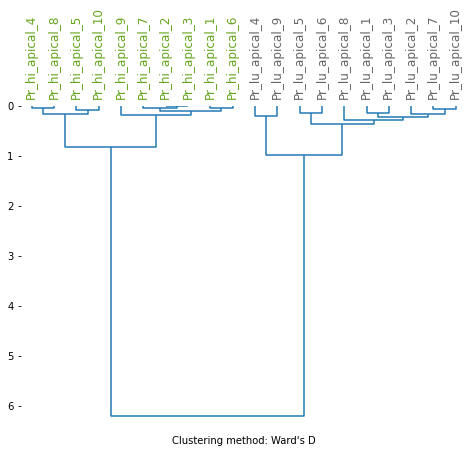

In [28]:
fig = flowers.plot_distances(genus=genus, area=area, show_fig=True, plot_type="dendrogram")
fig.show()

#### B. Produce all plots and save it

In [29]:
flowers.plot_all_inclusive(plot_type="dendrogram")

/Users/Thomsn/Desktop/island_in_the_sun/python/2021_03_bumbleview/bumbleview/plotting.py:323: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram_df = hierarchy.linkage(pairwise_color_dist, 'ward')


#### Heatmap

The heatmap is kind of a colorful depiction of the distance matrix, highlighting pairwise color distances. 

#### A. Show plot for selected genus/leaf area

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


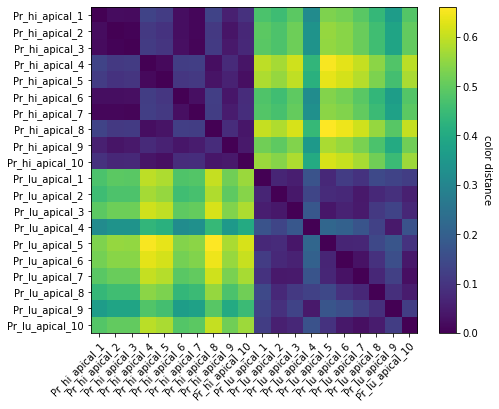

In [30]:
fig = flowers.plot_distances(genus=genus, area=area, show_fig=True, plot_type="heatmap")
fig.show()

#### B. Produce all plots and save it

In [6]:
flowers.plot_all_inclusive(plot_type="heatmap")

## Download all plots

So after producing several plots for physical and physiological spectrum analysis, the directory storing all can be downloaded here:

In [12]:
flowers.download_data()

/Users/Thomsn/Desktop/island_in_the_sun/python/2021_03_bumbleview/bumbleview/bumbleview/bumble_view_20210314185258184049.zip

## Clean up temporary directory

Please run the following codeblock to remove the temporary directory (warning: download the directory first, as this will delete all plots stored.)

In [13]:
flowers.close_temporary_dir()

# Some additional information

The Floral Reflectance Database (FReD; http://www.reflectance.co.uk/) stores reflectance data of several taxa. It is a great source for getting insights in the wide spectrum of floral spectra. As science is about cooperation and open data enables much more comparative studies, consider to submit you reflectance data there.

If you are looking for data of ERGs on specific taxa, a good summary can be found in the review by Van der Kooi. Its supplementary material involves a list of information on vision physiology of more than 300 insect taxa, including references.

This notebook was constructed by the support of Thomas Rupp (Salzburg, Austria), thanks for the help with the analysis. Thanks! And not to forget huge thanks to Chittka & Kevan for developing such a chilled, useful & straight forward method.

Also, this notebook uses a code by Dan Bruton to convert wavelengths t rgb colors: http://www.physics.sfasu.edu/astro/color/spectra.html
Thanks for that great invention.

# References

- Briscoe, A.D. and Chittka, L., 2001. The evolution of color vision in insects. Annual review of entomology, 46(1), pp.471-510.
- Chittka, L. and Kevan P., 2005. Flower colour as advertisement In Dafni A., Kevan P. & Husband B.C., (Eds.), Practical pollination biology (pp. 157–196). Enviroquest Ltd: Cambridge, Canada.
- Chittka, L. and Waser, N.M., 1997. Why red flowers are not invisible to bees. Israel Journal of Plant Sciences, 45(2-3), pp.169-183.
- Peitsch, D., Fietz, A., Hertel, H., de Souza, J., Ventura, D.F. and Menzel, R., 1992. The spectral input systems of hymenopteran insects and their receptor-based colour vision. Journal of Comparative Physiology A, 170(1), pp.23-40.
- van der Kooi, C.J., Stavenga, D.G., Arikawa, K., Belušič, G. and Kelber, A., 2021. Evolution of insect color vision: From spectral sensitivity to visual ecology. Annual Review of Entomology, 66.
- Wyszecki, G. and Stiles, W.S., 1982. Color Science: Concepts and Methods, Quantitative Data and Formulae. Wiley.
